# **Modelos  predictivos**

- Importamos librerías de algoritmos de regresión y definimos funciones auxiliares:

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [89]:
def split_train_test(df):
    train_set, test_set = train_test_split(df, test_size=0.25, random_state=72)
    train_set_x=train_set.drop(columns=['Cargo'])
    train_set_y= train_set['Cargo']
    test_set_x=test_set.drop(columns=['Cargo'])
    test_set_y= test_set['Cargo']
    return train_set_x, train_set_y, test_set_x, test_set_y

def ver_metricas(set, predict_set):
    mse = mean_squared_error(set, predict_set)
    rmse=np.sqrt(mse)
    r2_score_=r2_score(set, predict_set)
    rmse=print(f"RMSE: {round(rmse, 2)}")
    r2_score_=print(f"R2: {round(r2_score_, 2)}")

In [90]:
df = pd.read_excel('./Cargo_seguro_limpio.xlsx')

Regresión lineal simple(Variable Edad):

In [91]:
# Separamos las variables edad y cargo para realizar una regresion lineal simple:
df_regLinSimpl= pd.DataFrame(df[['Edad', 'Cargo']])
df_regLinSimpl.head(5)  

,Edad,Cargo
0,19,16884
1,18,1725
2,28,4449
3,33,21984
4,32,3866


In [92]:
# Se divide el dataset en un conjunto de engtrenamiento y uno de prueba:
rain_set_x_regLinSimpl, train_set_y_regLinSimpl, test_set_x_regLinSimpl, test_set_y_regLinSimpl= split_train_test(df_regLinSimpl)

In [93]:
# Se calcula la ordenada al origen y la pendiente del modelo:
linearRegression_simple= LinearRegression()
linearRegression_simple.fit(rain_set_x_regLinSimpl.values.reshape(-1,1), train_set_y_regLinSimpl.values)
print('Ordenada al origen:',linearRegression_simple.intercept_)
print('Pendiente :',linearRegression_simple.coef_)

Ordenada al origen: 2820.817147207523
Pendiente : [264.77909763]


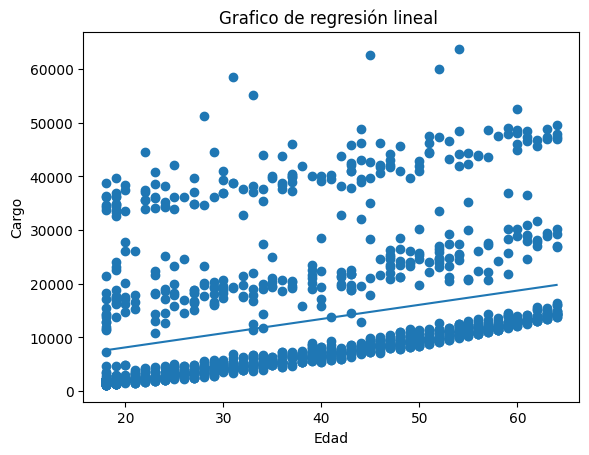

In [94]:
# Se grafica el resultado del modelo_
x_min_max=np.array([[df_regLinSimpl['Edad'].min()], [df_regLinSimpl['Edad'].max()]])
y_predict=linearRegression_simple.predict(x_min_max)
plt.plot(x_min_max,y_predict)
plt.scatter(df_regLinSimpl['Edad'], df['Cargo'])
plt.title('Grafico de regresión lineal ')
plt.xlabel('Edad')
plt.ylabel('Cargo')
plt.show()

In [95]:
# Se calculan las métricas:
y_predict_regLinSimpl= linearRegression_simple.predict(test_set_x_regLinSimpl.values.reshape(-1,1))
ver_metricas(test_set_y_regLinSimpl,y_predict_regLinSimpl)  

RMSE: 11629.08
R2: 0.08


El resultado de la regresión lineal simple teniendo en cuenta la variable edad nos da un RMSE alto y un R2 bajo por lo que no es buen resultado y no nos va a servir como predictor del cargo del seguro.

Regresión lineal multiple

In [96]:
# Se transforman las variables categóricas en numéricas y se separa el dataframe:
df_regLinMult =pd.get_dummies(df, columns=['Sexo', 'Fumador', 'Región'])
train_set_x, train_set_y, test_set_x, test_set_y= split_train_test(df_regLinMult) 

In [97]:
regr_mult = LinearRegression()
regr_mult.fit(train_set_x, train_set_y.values.reshape(-1, 1))

LinearRegression()

In [98]:
test_pred_y_regMult=regr_mult.predict(test_set_x)
ver_metricas(test_set_y,test_pred_y_regMult)

RMSE: 6224.98
R2: 0.74


Con la regresión lineal multiple disminuyó el RMSE y aumentó el R2 por lo que el resultado mejoró en gran medida.

KNN

In [99]:
modelo_knn=KNeighborsRegressor()
modelo_knn.fit(train_set_x, train_set_y)
predict_knn_y=modelo_knn.predict(test_set_x)
ver_metricas(test_set_y,predict_knn_y)

RMSE: 10320.12
R2: 0.28


El modelo KNN tiene una alto RMSE y una bajo R2, lo que nos indica que no es un buen modelo para predecir el valor del cargo. 

Árbol de decisión 

In [100]:
arbol_dec= DecisionTreeRegressor(random_state=20)
parametros = {'criterion':['squared_error'],'max_depth':[2,3,4,5,6,7,8,9,10,11], 'splitter':['best', 'random']}
random_arbol= RandomizedSearchCV(estimator=arbol_dec,param_distributions=parametros, scoring='neg_mean_squared_error', cv=10 )
random_arbol.fit(train_set_x, train_set_y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=20),
                   param_distributions={'criterion': ['squared_error'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [101]:
print(random_arbol.best_params_)
best_score= random_arbol.best_score_
best_rmse= np.sqrt(-best_score)
print(round(best_rmse, 2))

{'splitter': 'best', 'max_depth': 3, 'criterion': 'squared_error'}
4695.75


In [102]:
arbol=DecisionTreeRegressor(criterion='squared_error',max_depth=3, random_state=20, splitter= 'best')
arbol.fit(train_set_x, train_set_y)
predict_y_arbol= arbol.predict(test_set_x)
ver_metricas(test_set_y,predict_y_arbol)

RMSE: 4909.39
R2: 0.84


El árbol de decisión mejoró aún mas el rendimiento, aumentando el R2 y disminuyendo el RMSE.